### Imports

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data selection

In [3]:
# European Defence stocks: Leonardo(Italy), Rheinmetall(Germany), Safran(France), Airbus(France), BAE Systems(UK)  
stocks = ['LDO.MI', 'RHM.DE', 'SAF.PA', 'AIR.PA', 'BAESY']
benchmark = '^STOXX' # Euro Stoxx 600 index

start_date = '2019-02-24' # 3 years before invasion
invasion_date = '2022-02-24'
present_date = pd.Timestamp.today().strftime('%Y-%m-%d')


### Download Data from Yahoo Finance

In [4]:
df = yf.download(stocks + [benchmark], start=start_date, end=present_date, auto_adjust=True)['Close']

[*********************100%***********************]  6 of 6 completed


### Get returns

In [23]:
#Compute daily returns
daily_returns = round(df.pct_change(), 2).dropna()

#Compute cumulative returns
cum_returns = round((1 + daily_returns).cumprod(), 2)
cum_returns_perc = (cum_returns -1) * 100

#Split returns between pre- and post-invasion
pre_invasion = cum_returns_perc[:invasion_date]
post_invasion = cum_returns_perc[invasion_date:]

cum_returns_perc

Ticker,AIR.PA,BAESY,LDO.MI,RHM.DE,SAF.PA,^STOXX
Date,,,,,,
2019-02-26,0.0,1.0,1.0,-1.0,0.0,0.0
2019-02-27,0.0,1.0,1.0,-2.0,0.0,0.0
2019-02-28,0.0,-1.0,0.0,-2.0,0.0,0.0
2019-03-01,0.0,-1.0,-1.0,8.0,0.0,0.0
2019-03-04,0.0,0.0,-2.0,7.0,0.0,0.0
...,...,...,...,...,...,...
2025-09-22,69.0,495.0,539.0,2361.0,161.0,54.0
2025-09-23,69.0,489.0,526.0,2336.0,158.0,54.0
2025-09-24,69.0,501.0,558.0,2409.0,158.0,54.0


### Visualization

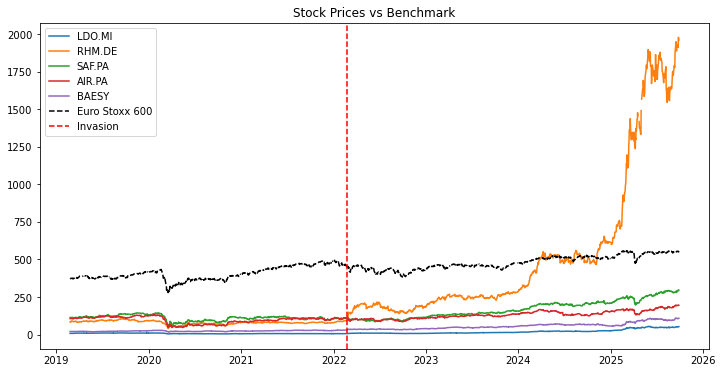

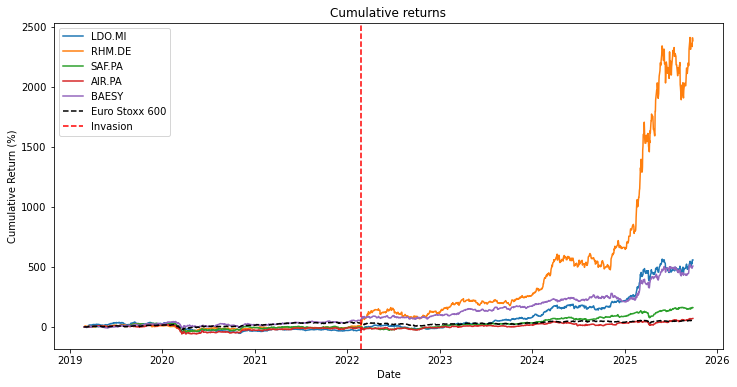

In [11]:
#Stock Prices
plt.figure(figsize=(12,6))
for stock in stocks:
    plt.plot(df[stock], label=stock)
plt.plot(df[benchmark], label='Euro Stoxx 600', linestyle='--', color='black')

plt.axvline(pd.to_datetime(invasion_date), color='red', linestyle='--', label='Invasion')

plt.title('Stock Prices vs Benchmark')
plt.legend()
plt.show()

#Cumulative returns
plt.figure(figsize=(12,6))
for stock in stocks:
    plt.plot(cum_returns_perc[stock], label=stock)
plt.plot(cum_returns_perc[benchmark], label='Euro Stoxx 600', linestyle='--', color='black')

plt.axvline(pd.to_datetime(invasion_date), color='red', linestyle='--', label='Invasion')

plt.title('Cumulative returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (%)')
plt.legend()
plt.show()


### Stats

In [28]:
stats = pd.DataFrame({
    'Mean Daily Return': daily_returns.mean(),
    'Volatility': daily_returns.std(),
    'Tot Return (%)': cum_returns_perc.iloc[-1]

})
stats

,Mean Daily Return,Volatility,Tot Return (%)
Ticker,,,
AIR.PA,0.000610,0.024384,70.0
BAESY,0.001227,0.018368,507.0
LDO.MI,0.001403,0.024333,558.0
RHM.DE,0.002212,0.025713,2384.0
SAF.PA,0.000833,0.023190,161.0
^STOXX,0.000311,0.010775,54.0


### Comments

We have two problems with the first graph (name graph): to start with, stocks start from different price levels (for example Airbus trades in the €100s whereas Leonardo was trading in the single digits at the beginning of 2022) so any representation on the same scale is prone to giving a false perception of relative performance.

Secondly, Rheinmetall's gains on the market since the invasion were so high as to dwarf the other stocks under analysis; but both Baesy and Leonardo showed very high growth as well, posting a total return to-date roughly 10 times higher than the benchmark (see summary stats). That dwarfing effect can be seen in the second graph (name graph).